#### Dataset

In [2]:
# Dataset: Salary_Data.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the data

In [6]:
df = pd.read_csv('Salary_Data.csv')

In [7]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [8]:
df.shape

(30, 2)

#### Separate the input and output data

In [10]:
x = df[['YearsExperience']]
y = df['Salary']

#### Explore the data

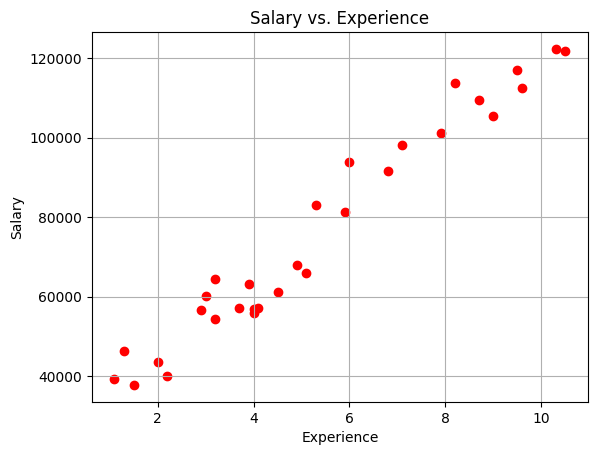

In [12]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'r')

#### Cross Validation

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [16]:
x_train.shape

(22, 1)

In [17]:
x_test.shape

(8, 1)

In [18]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


#### Build the model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression()

In [22]:
regressor.fit(x_train, y_train)

LinearRegression()

In [23]:
# Value of m
regressor.coef_

array([9379.71049195])

In [24]:
# Value of c
regressor.intercept_

26986.691316737248

In [25]:
y_pred = regressor.predict(x_test)

In [26]:
y_pred


array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [27]:
y_test.values

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794])

In [30]:
result = pd.DataFrame({
    'Actual in Dataset': y_test,
    'Predicted by Algo': y_pred
})

In [31]:
result

,Actual in Dataset,Predicted by Algo
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


#### Performance Evaluation

In [35]:
# Mean absolute error
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [38]:
# R-Squared Error / Accuracy of Linearity
regressor.score(x_train, y_train)

0.9395413526983522

In [39]:
# R-Squared Error / Accuracy of Linearity
regressor.score(x_test, y_test)

0.9779208335417602

In [42]:
regressor.fit(x, y)

LinearRegression()

In [43]:
y_pred = regressor.predict(x)

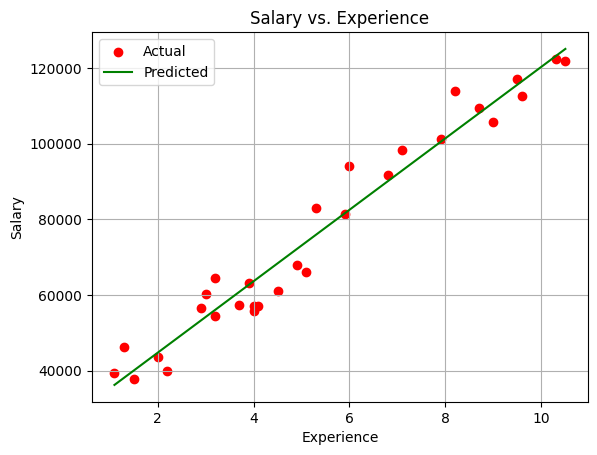

In [44]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'r',label='Actual')
plt.plot(x, y_pred, color='g', label='Predicted')
plt.legend()

In [45]:
regressor.predict([[12]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139191.74805613])

In [46]:
regressor.predict([[15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167541.63502049])

In [47]:
regressor.predict([[0.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30517.1813594])

In [48]:
regressor.coef_[0] * 15 + regressor.intercept_

167541.63502049487